In [35]:
import networkx as nx
import opening_module_path
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle
from matplotlib.widgets import Button
from matplotlib.patches import Circle
from matplotlib.figure import Figure 
import pandas as pd
import numpy as np
import itertools
import heapq
from shapely import *
from shapelysmooth import *
import copy
import closed_path
import clp_test
import math
import random
import io
G = nx.MultiDiGraph() #or G = nx.MultiDiGraph()
# G = nx.PlanarEmbedding()

# print(point_stor)
# print(degrees)
# print(edges_stor)

def main(graph):
    global iter, num_zeroes, degrees, point_stor, colors, col_i, fig, ax, fill_image, fill_x, fill_y, prev_fill_color, dist, fill, flood_fill, grid, valid_paths, get_neighbors, heuristic, sec_start, sec_end
    
    name = r"\Graph " + str(graph)
    source_path = r"C:\Users\2000039241\OneDrive - Fulton County Schools\Desktop\Sprouts-main\Saved Graphs" + name
    image_path = source_path + r'\Plain.png'

    play, degrees, point_stor, main_stor, edges_stor, transforms = opening_module_path.open_graph(source_path)
    for i in range(len(point_stor)):
        x, y = point_stor[i]
        point_stor[i] = (x - transforms[0] + 100, y - transforms[1] + 100)
    #image_path = r'C:\Users\zm03701\Pictures\sprouts1.png'
    image = Image.open(image_path)
    width, height = image.size

    # colors = [(255, 153, 153), (255, 204, 153), (255, 255, 153), (204, 255, 153), (153, 255, 153), (153, 255, 204), (153, 255, 255), (153, 204, 255), (153, 153, 255), (204, 153, 255), (255, 153, 255), (255, 153, 204), (255, 102, 102), (255, 178, 102), (255, 255, 102), (178, 255, 102), (102, 255, 102), (102, 255, 178), (102, 255, 255), (102, 178, 255), (102, 102, 255), (178, 102, 255), (255, 102, 255), (255, 102, 178), (255, 204, 204), (255, 229, 204), (255, 255, 204), (229, 255, 204), (204, 255, 204), (204, 255, 299), (204, 255, 255), (204, 229, 255), (204, 204, 255), (255, 204,255), (255, 204, 229)]
    colors= [(216, 108, 108), (229, 131, 114), (242, 157, 121), (255, 184, 127), (216, 173, 108), (229, 200, 114), (242, 230, 121), (248, 255, 127), (195, 216, 108), (189, 229, 114), (181, 242, 121), (172, 255, 127), (130, 216, 108), (120, 229, 114), (121, 242, 133), (127, 255, 159), (108, 216, 151), (114, 229, 177), (121, 242, 205), (127, 255, 235), (108, 216, 216), (114, 212, 229), (121, 205, 242), (127, 197, 255), (108, 151, 216), (114, 143, 229), (121, 133, 242), (133, 127, 255), (130, 108, 216), (154, 114, 229), (181, 121, 242), 
    (210, 127, 255), (195, 108, 216), (223, 114, 229), (242, 121, 230), (255, 127, 223), (216, 108, 173), (229, 114, 166), (242, 121, 157), (255, 127, 146)]

    # print(len(colors))
    random.shuffle(colors)

    col_i = 0
    fig, ax = plt.subplots()
    plt.imshow(image)
    plt.axis('off')

    fill_image = image.copy()
    cursor = Rectangle((0, 0), 0, 0, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(cursor)

    def dist(tupl1, tupl2):
            return ((tupl2[0] - tupl1[0]) ** 2 + (tupl2[1] - tupl1[1]) ** 2) ** 0.5

    fill_x, fill_y = 0, 0
    prev_fill_color = (255, 255, 0, 255)

    def fill(x, y):
        global colors, col_i, fig, ax, fill_image, fill_x, fill_y, prev_fill_color, dist, fill, flood_fill
        fill_x, fill_y = int(x), int(y)

        current_fill_color = fill_image.getpixel((fill_x, fill_y))[0:3]

        if current_fill_color[0:3] != (240, 240, 240):
            return

        if col_i == len(colors):
            col_i = 0

        fill_color = colors[col_i]
        col_i += 1
        flood_fill(fill_color)
        plt.draw()

    def flood_fill(fill_color):
        global colors, col_i, fig, ax, fill_image, fill_x, fill_y, prev_fill_color, dist, fill
        width, height = fill_image.size
        pixels = fill_image.load()
        target_color = pixels[fill_x, fill_y]

        stack = [(fill_x, fill_y)]
        visited = set()

        while stack:
            x, y = stack.pop()
            if (x, y) in visited:
                continue

            visited.add((x, y))

            if (
                0 <= x < width and
                0 <= y < height and
                pixels[x, y] == target_color
            ):
                pixels[x, y] = fill_color
                stack.extend([(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)])

        plt.imshow(fill_image)

    # fills = [(150, 200), (155, 200), (260, 200), (300, 200)]
    for i in range(width):
        for j in range(height):
            fill(i, j)


    color_bounds = {}
    min_vbounds = {}
    min_hbounds = {}

    # Iterate through every pixel in the image
    for x in range(width):
        for y in range(height):
            pixel_color = fill_image.getpixel((x, y))[0:3]

            # Skip black border pixels
            # if pixel_color == (0, 0, 0):
            #     continue
            # else:

            # Update bounds for the current color
            if pixel_color not in color_bounds and pixel_color:
                color_bounds[pixel_color] = {'left': x, 'right': x, 'top': y, 'bottom': y}
            else:
                color_bounds[pixel_color]['left'] = min(color_bounds[pixel_color]['left'], x)
                color_bounds[pixel_color]['right'] = max(color_bounds[pixel_color]['right'], x)
                color_bounds[pixel_color]['top'] = min(color_bounds[pixel_color]['top'], y)
                color_bounds[pixel_color]['bottom'] = max(color_bounds[pixel_color]['bottom'], y)

    # Print or use the calculated bounds
    # for color, bounds in color_bounds.items():
    #     print(f"Color: {color}, Bounds: {bounds}")

    horz_lines = []
    vert_lines = []
    for color in color_bounds:
        if color != (0,0, 0):
            horz_lines.append(color_bounds[color]['left'])
            horz_lines.append(color_bounds[color]['right'])
            vert_lines.append(color_bounds[color]['top'])
            vert_lines.append(color_bounds[color]['bottom'])

    # for point in point_stor:
    #     horz_lines.append(point[0])
    #     vert_lines.append(point[1])

    # print(col_i)
    for color in color_bounds:
        min_vbounds[color] = (height, 0)
        min_hbounds[color] = (width, 0)

    previous_color = fill_image.getpixel((0, 0))[0:3]

    for x in range(width):
        diffs = [abs(x - line) for line in horz_lines]
        if min(diffs) > 30:
            current = 0
            for y in range(height):
                current_color = fill_image.getpixel((x, y))[0:3]
                # print(current_color)
                if (current_color == previous_color):
                    current += 1
                else:
                    if current > 10 and current < min_vbounds[previous_color][0]:
                        min_vbounds[previous_color] = (current, x)
                    current = 0
                    
                previous_color = current_color

    for y in range(height):
        diffs = [abs(y - line) for line in vert_lines]
        if min(diffs) > 30:
            current = 0
            for x in range(width):
                current_color = fill_image.getpixel((x, y))[0:3]
                # print(current_color)
                if (current_color == previous_color):
                    current += 1
                else:
                    if current > 10 and current < min_hbounds[previous_color][0]:
                        min_hbounds[previous_color] = (current, y)
                    current = 0
                    
                previous_color = current_color

    # print(min_hbounds)
    # print(min_vbounds)

    adj_cols_stor = []
    valid_pts = []
    valid_paths = []
    routes = []
    for i, point in enumerate(point_stor):
        if degrees[i] <= 2:
            adj_cols = []
            x, y = point
            for j in range(-5, 5):
                for k in range(-5, 5):
                    px_col = fill_image.getpixel((x + j, y + k))[0:3]
                    if px_col[0:3] != (240, 240, 240) and px_col[0:3] != (0, 0, 0) and px_col[0:3] not in adj_cols:
                        adj_cols.append(px_col[0:3])
            adj_cols_stor.append(adj_cols)
            valid_pts.append(point)
            if degrees[i] <= 1:
                valid_paths.append((point, point))
                routes.append(adj_cols)
    # print("***")
    # print(adj_cols_stor)
    # print(valid_pts)


    combs = tuple(itertools.combinations(range(len(valid_pts)), 2))
    # print(combs)
    for comb in combs:
        p1, p2 = comb
        if bool(set(adj_cols_stor[p1]) & set(adj_cols_stor[p2])) == True:
            valid_paths.append((valid_pts[p1], valid_pts[p2]))
            routes.append(list(set(adj_cols_stor[p1]) & set(adj_cols_stor[p2])))
            # print('Path exists from: ' + str(valid_pts[p1]) + ' to ' + str(valid_pts[p2]) + ' with route ' + str(set(adj_cols_stor[p1]) & set(adj_cols_stor[p2])))
                
    # print(valid_paths)
    # print(routes)

    # for point in point_stor:
    #     x, y = point
    #     plt.scatter(x , y, marker='o', color="red", edgecolors='black')

    print('*** Number of paths:')
    print(len(valid_paths))
    # print(valid_paths)
    # print(routes)
    final_output_paths = {}
    for vp in valid_paths:
        final_output_paths[vp] = 0


    for path_selection in range(len(valid_paths)):
        cut = 5

        close_p = []
        for i in range(math.floor(width/cut)):
            for j in range(math.floor(height/cut)):
                dists = []
                for point in point_stor:
                    dists.append(dist((cut * i, cut * j), point))
                if min(dists) <= 15:
                    close_p.append((cut * i, cut * j))

        # print(close_p)

        # for route in routes[path_selection]:
        print('Creating Grid')

        output_paths = {}

        for col_sec in routes[path_selection]:
            # if col_sec == colors[0]:
            #     col_sec = routes[path_selection][1]
            selection = color_bounds[col_sec]
            grid_dots = []

            if valid_paths[path_selection][0] != valid_paths[path_selection][1]:
                if col_sec == colors[0]:
                    cut = 10
                    print('going')
                    for i in range(math.floor(width/cut)):
                        for j in range(math.floor(height/cut)):
                            # if not(cut * i > color_bounds[(0, 0, 0)]['left'] and cut * i < color_bounds[(0, 0, 0)]['right'] and cut * j > color_bounds[(0, 0, 0)]['top'] and cut * j < color_bounds[(0, 0, 0)]['bottom']):
                            adj_cols_plot = []
                            dists2 = []
                        

                            if ((abs(cut * i - color_bounds[(0, 0, 0)]['left']) < 30 or abs(cut * i - color_bounds[(0, 0, 0)]['right']) < 30 or abs(cut * j - color_bounds[(0, 0, 0)]['top']) < 30 or abs(cut * j - color_bounds[(0, 0, 0)]['bottom']) < 30) and color_bounds[(0, 0, 0)]['left'] - 30 < cut * i < color_bounds[(0, 0, 0)]['right'] + 30 and color_bounds[(0, 0, 0)]['top'] - 30 < cut * j < color_bounds[(0, 0, 0)]['bottom'] + 30) or (cut * i > color_bounds[(0, 0, 0)]['left'] and cut * i < color_bounds[(0, 0, 0)]['right'] and cut * j > color_bounds[(0, 0, 0)]['top'] and cut * j < color_bounds[(0, 0, 0)]['bottom']):                   
                                adj_filt = 3

                                for u in range(-1*adj_filt, adj_filt + 1):
                                    for v in range(-1*adj_filt, adj_filt + 1):
                                        if (2 * u + cut * i > 0 and 2 * v + cut * j > 0 and 2 * u + 2* i < width and 2 * v + cut * j < height):
                                            if fill_image.getpixel((2 * u + cut * i, 2 * v + cut * j))[0:3] not in adj_cols_plot:
                                                adj_cols_plot.append(fill_image.getpixel((2 * u + cut * i, 2 * v + cut * j))[0:3])   
                                
                                # if cut * i%10 == 0 and cut * j%10 == 0:
                                # # if fill_image.getpixel((i, j)) == :
                                #     plt.plot(cut * i, cut * j, marker = 'o', markersize = 0.5, color = 'black')
                            if ((cut * i, cut * j) not in close_p) and (fill_image.getpixel((cut * i, cut * j))[0:3]) == col_sec and (0, 0, 0) not in adj_cols_plot:
                                # if fill_image.getpixel((i, j)) == :
                                grid_dots.append((cut * i, cut * j))
                    for dot in grid_dots:
                        pass
                        #plt.plot(dot[0], dot[1], marker = 'o', markersize = 0.5, color = 'black')

                else:
                    print('starting inner')
                    if (math.ceil(selection['right']) - math.floor(selection['left'])) < 200 or (math.ceil(selection['bottom']) - math.floor(selection['top'])) < 200:
                        cut = 5
                    else:
                        cut = 10
                    for i in range(math.floor((selection['left'] - 10)/cut), math.ceil((selection['right'] + 10)/cut)):
                        for j in range(math.floor((selection['top'] - 10)/cut), math.ceil((selection['bottom'] + 10)/cut)):
                            adj_cols_plot = []
                            hadj_filt = max(math.floor(min_hbounds[col_sec][0]/3), 7)
                            vadj_filt =  max(math.floor(min_vbounds[col_sec][0]/3), 7)

                            hadj_filt = 5
                            vadj_filt = 5
                            # print(hadj_filt, vadj_filt)

                            for u in range(-1*hadj_filt, hadj_filt + 1):
                                for v in range(-1*vadj_filt, vadj_filt + 1):
                                    if (u + cut * i >= 0 and v + cut * j >= 0 and u + cut * i < width and v + cut * j < height):
                                        if fill_image.getpixel((u + cut * i, v + cut * j))[0:3] not in adj_cols_plot:
                                            adj_cols_plot.append(fill_image.getpixel((u + cut * i, v + cut * j))[0:3])
                            if (0, 0, 0) not in adj_cols_plot:
                                if fill_image.getpixel((cut * i, cut * j))[0:3] == col_sec:
                                    grid_dots.append((cut * i, cut * j))
                    for dot in grid_dots:
                        plt.plot(dot[0], dot[1], marker = 'o', markersize = 0.5, color = 'black')
            # plt.show()
            print('* * * * * * * *')
            print(valid_paths[path_selection])
            start_point = valid_paths[path_selection][0]
            end_point = valid_paths[path_selection][-1]
            if valid_paths[path_selection][0] != valid_paths[path_selection][1]:
                print('Done')
                ref_grid = []
                grid = []
                xdot = []
                ydot = []
                # print(grid_dots)

                pdists_init = []
                pdists_final = []
                for dot in grid_dots:
                    pdists_init.append(dist(start_point, dot))
                    pdists_final.append(dist(end_point, dot))

                sec_start = grid_dots[pdists_init.index(min(pdists_init))]
                sec_end = grid_dots[pdists_final.index(min(pdists_final))]

                for dot in grid_dots:
                    if dot[0] not in xdot:
                        xdot.append(dot[0])
                    if dot[1] not in ydot:
                        ydot.append(dot[1])
                xdot = sorted(xdot, reverse=False)
                ydot = sorted(ydot)
                num_zeroes = 0
                for y in ydot:
                    row = []
                    ref_row = []
                    for x in xdot:
                        if (x, y) in grid_dots:
                            row.append(1)
                        else:
                            row.append(0)
                            num_zeroes += 1
                        ref_row.append((x, y))
                    grid.append(row)
                    ref_grid.append(ref_row)

                # for jow in grid:
                #     print(jow)
                def grid_index(point, grid):
                    for rw in range(len(grid)):
                        for cl in range(len(grid[0])):
                            if grid[rw][cl] == point:
                                return ((rw, cl))
        
                start_ind = grid_index(sec_start, ref_grid)
                end_ind = grid_index(sec_end, ref_grid)

                

                print('A* Path Starting')
                rows = len(grid)
                cols = len(grid[0])
                # print(rows, cols)

            # Define the possible movements (up, down, left, right, and diagonals if allowed)
            movements = [
                (-1, 0),  # Up
                (1, 0),   # Down
                (0, -1),  # Left
                (0, 1),   # Right
                (-1, -1), # Diagonal Up-Left
                (-1, 1),  # Diagonal Up-Right
                (1, -1),  # Diagonal Down-Left
                (1, 1)    # Diagonal Down-Right
            ]

            def heuristic(a, b):
                global grid, num_zeroes
                # Manhattan distance heuristic
                ex1, ex2 = a[0], a[1]
                d = 0
                while (0 <= ex1 + d < len(grid)) and (0 <= ex2 + d < len(grid[0])) and (0 <= ex1 - d < len(grid)) and (0 <= ex2 - d < len(grid[0])):
                    if grid[ex1][ex2 - d] == 0 or grid[ex1][ex2 + d] == 0 or grid[ex1 - d][ex2] == 0 or grid[ex1 + d][ex2] == 0 or grid[ex1 + d][ex2 + d] == 0 or grid[ex1 - d][ex2 + d] == 0 or grid[ex1 + d][ex2 - d] == 0 or grid[ex1 - d][ex2 - d] == 0:
                        break
                    else:
                        d += 1
                # print(d)
                if num_zeroes > 1500:
                    return (abs(a[0] - b[0]) + abs(a[1] - b[1])) + 500 * (100 - d)
                else:
                    return (abs(a[0] - b[0]) + abs(a[1] - b[1])) + 50 * (100 - d)

            def get_neighbors(point):
                neighbors = []
                for move in movements:
                    new_row = point[0] + move[0]
                    new_col = point[1] + move[1]
                    if 0 <= new_row < rows and 0 <= new_col < cols and grid[new_row][new_col] == 1:
                        # Calculate distance from the grid boundaries
                        distance_to_boundary = min(new_row, rows - new_row - 1, new_col, cols - new_col - 1)
                        neighbors.append((new_row, new_col, distance_to_boundary))
                neighbors.sort(key=lambda x: x[2], reverse=True)  # Sort neighbors by distance to boundary (farthest first)
                return [(row, col) for row, col, _ in neighbors]

            def astar(start, goal):
                global get_neighbors, heuristic
                open_list = []
                heapq.heapify(open_list)
                g = {start: 0}
                parent = {start: None}
                heapq.heappush(open_list, (0, start))

                while open_list:
                    current = heapq.heappop(open_list)[1]
                    if current == goal:
                        break
                    for neighbor in get_neighbors(current):
                        new_cost = g[current] + 1  # Assuming each movement has a cost of 1

                        if neighbor not in g: # or new_cost < g[neighbor]:
                            g[neighbor] = new_cost
                            f = new_cost + heuristic(neighbor, goal)
                            heapq.heappush(open_list, (f, neighbor))
                            parent[neighbor] = current

                # Reconstruct the path from start to goal
                path = []
                current = goal
                while current != start:
                    path.append(current)
                    current = parent[current]
                path.append(start)
                path.reverse()

                return path
                # except:
                #     print('Path too narrow at some area')

            def find_loop():
                global fill_image, valid_paths
                comb = valid_paths[path_selection]
                for rad in [100, 80, 60, 30]:
                    for cas in [1, 2, 3, 4]:
                        adj_cols_loop = []
                        adj_filt_loop = rad
                        if cas == 1:
                            for i in range(1, adj_filt_loop):
                                for j in range(1, adj_filt_loop):
                                    if fill_image.getpixel((comb[0][0] + i, comb[0][1] + j))[0:3] not in adj_cols_loop:
                                        adj_cols_loop.append(fill_image.getpixel((comb[0][0] + i, comb[0][1] + j))[0:3])
                        
                        if cas == 2:
                            for i in range(-1*adj_filt_loop, 0):
                                for j in range(1, adj_filt_loop):
                                    if fill_image.getpixel((comb[0][0] + i, comb[0][1] + j))[0:3] not in adj_cols_loop:
                                        adj_cols_loop.append(fill_image.getpixel((comb[0][0] + i, comb[0][1] + j))[0:3])

                        if cas == 3:
                            for i in range(-1*adj_filt_loop, 0):
                                for j in range(-1*adj_filt_loop, 0):
                                    if fill_image.getpixel((comb[0][0] + i, comb[0][1] + j))[0:3] not in adj_cols_loop:
                                        adj_cols_loop.append(fill_image.getpixel((comb[0][0] + i, comb[0][1] + j))[0:3])

                        if cas == 4:
                            for i in range(1, adj_filt_loop):
                                for j in range(-1*adj_filt_loop, 0):
                                    if fill_image.getpixel((comb[0][0] + i, comb[0][1] + j))[0:3] not in adj_cols_loop:
                                        adj_cols_loop.append(fill_image.getpixel((comb[0][0] + i, comb[0][1] + j))[0:3])

                        if ((0, 0, 0) in adj_cols_loop) == False:
                            good_path = clp_test.generate_closed((int(comb[0][0]), int(comb[0][1])), adj_filt_loop, cas)
                            return good_path
            if start_point != end_point:
                path = astar(start_ind, end_ind)
                good_path = [start_point]
                if num_zeroes > 1500:
                    if len(path) > 300:
                        smooth_cut = 5
                    elif len(path) > 100:
                        smooth_cut = 3
                    elif len(path) > 50:
                        smooth_cut = 2
                    else:
                        smooth_cut = 1
                else:
                    smooth_cut = 10

                for count, point in enumerate(path):

                    if count % smooth_cut == 0:
                    #print(ref_grid[point[0]][point[1]])
                        good_path.append(ref_grid[point[0]][point[1]])
                good_path.append(end_point)
                good_path = chaikin_smooth(good_path, keep_ends = True) 
            else:
                good_path = catmull_rom_smooth(find_loop())
            
            # print('lets gp')
            print('Done')

            midpoint = good_path[math.floor(len(good_path)/2)]
            output_paths[col_sec] = {'iter': iter, 'path': 0, 'midpoint': 0, 'start': 0, 'end': 0}
            output_paths[col_sec]['midpoint'] = midpoint
            output_paths[col_sec]['path'] = good_path 
            final_output_paths[valid_paths[path_selection]] = output_paths
            # for point in valid_paths[path_selection]:
            #     x, y = point
            #     plt.scatter(x , y, marker='o', color="lime", edgecolors='black')
    plt.close('all')
    return final_output_paths, fill_image, image
    for color, path in output_paths.items():
        plt.figure(str(color))
        plt.imshow(image)
        plt.axis('off')

        x_val = [x[0] for x in path['path']]
        y_val = [x[1] for x in path['path']]

        plt.plot(x_val,y_val)
        plt.scatter(x_val[0], y_val[0], marker='o', color="lime", edgecolors='black', zorder= 3)
        plt.scatter(x_val[-1], y_val[-1], marker='o', color="lime", edgecolors='black', zorder= 3)
        for point in point_stor:
            x, y = point
            plt.scatter(x , y, marker='o', color="red", edgecolors='black', zorder = 2)
        plt.scatter(path['midpoint'][0],path['midpoint'][1], marker='o', color="red", edgecolors='black', zorder = 2)
        # plt.scatter(sec_end[0], sec_end[1], color='lime')
        
    plt.show()
# img_buf = io.BytesIO()
# plt.savefig(r"C:\Users\2000039241\OneDrive - Fulton County Schools\Desktop\tempG.png", format='png', bbox_inches='tight', pad_inches = 0, dpi = 100*1.12903226)

# temp_image = Image.open(r"C:\Users\2000039241\OneDrive - Fulton County Schools\Desktop\tempG.png")
# plt.figure('New')
# plt.axis('off')
# plt.imshow(temp_image)
# plt.show()

In [36]:
output, cimg, bimg = main(22)

*** Number of paths:
15
Creating Grid
starting inner
* * * * * * * *
((551.0, 406.1575312325548), (311.0, 544.721595838065))
Done
A* Path Starting
Done
Creating Grid
starting inner
* * * * * * * *
((551.0, 406.1575312325548), (310.99999999999994, 267.59346662704456))
Done
A* Path Starting
Done
Creating Grid
going
* * * * * * * *
((551.0, 406.1575312325548), (266.0, 704.1575312325548))
Done
A* Path Starting
Done
starting inner
* * * * * * * *
((551.0, 406.1575312325548), (266.0, 704.1575312325548))
Done
A* Path Starting
Done
Creating Grid
starting inner
* * * * * * * *
((551.0, 406.1575312325548), (429.2564483109298, 311.04614846061895))
Done
A* Path Starting
Done
Creating Grid
starting inner
* * * * * * * *
((551.0, 406.1575312325548), (352.0, 476.1575312325548))
Done
A* Path Starting
Done
Creating Grid
starting inner
* * * * * * * *
((311.0, 544.721595838065), (310.99999999999994, 267.59346662704456))
Done
A* Path Starting
Done
Creating Grid
starting inner
* * * * * * * *
((311.0, 544

((551.0, 406.1575312325548), (311.0, 544.721595838065))
(216, 108, 108) : {'iter': <built-in function iter>, 'path': [(551.0, 406.1575312325548), (545.328125, 405.5606791907687), (544.98046875, 405.5354023663457), (544.62890625, 405.5210215685169), (544.2734375, 405.51753679728245), (543.9140625, 405.5249480526423), (543.55078125, 405.54325533459644), (543.18359375, 405.57245864314484), (542.8125, 405.61255797828755), (542.4375, 405.6635533400245), (542.05859375, 405.7254447283558), (541.67578125, 405.7982321432814), (541.2890625, 405.8819155848013), (540.8984375, 405.9764950529154), (540.50390625, 406.0819705476239), (540.10546875, 406.19834206892665), (539.703125, 406.32560961682367), (539.296875, 406.463773191315), (538.88671875, 406.61283279240064), (538.47265625, 406.77278842008053), (538.0546875, 406.9436400743548), (537.6328125, 407.12538775522324), (537.20703125, 407.31803146268606), (536.77734375, 407.52157119674314), (536.34375, 407.7360069573945), (535.90625, 407.96133874464

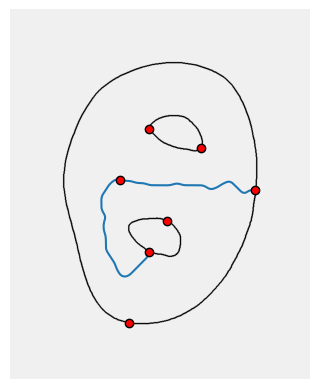

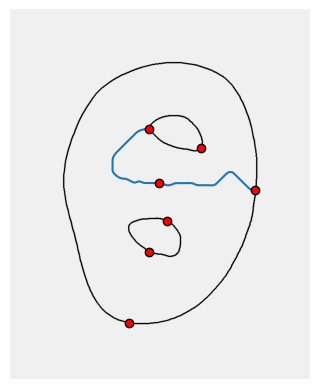

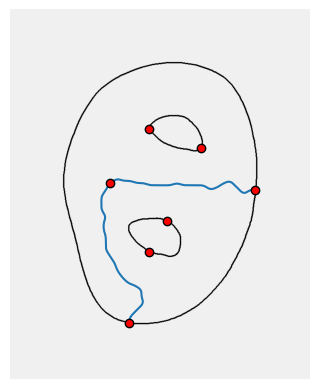

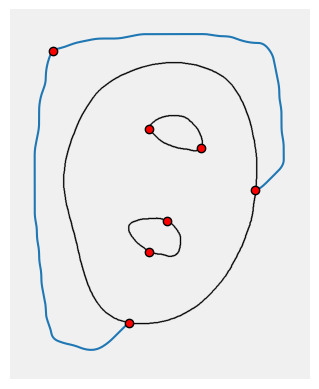

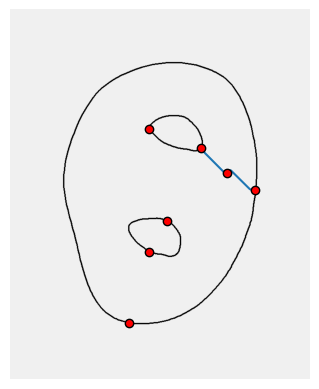

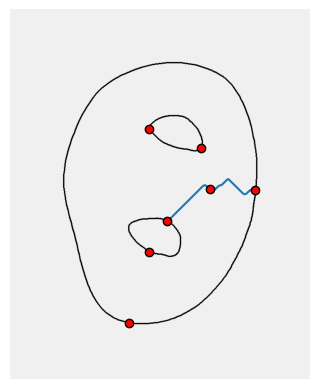

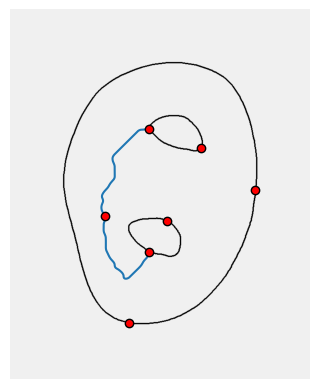

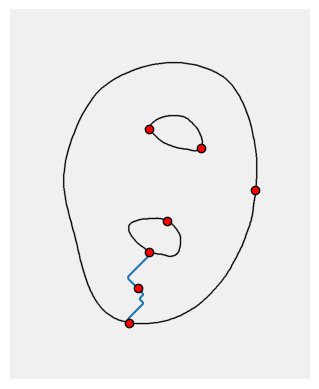

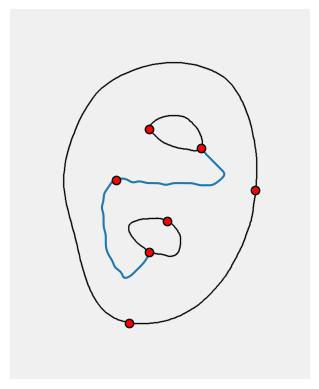

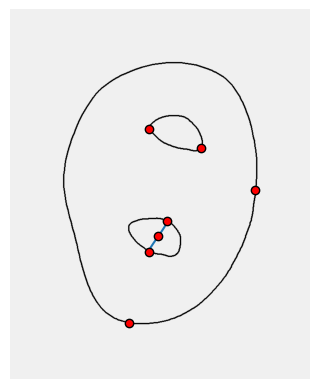

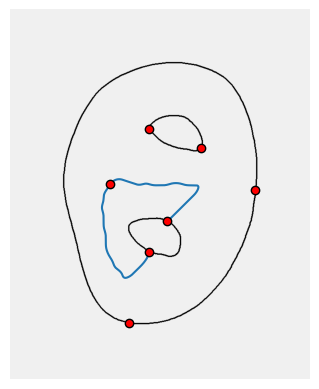

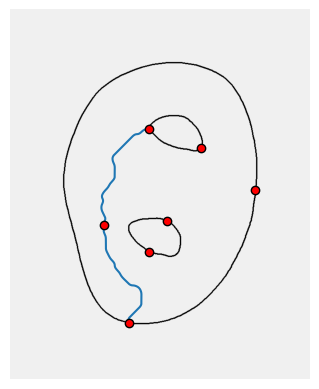

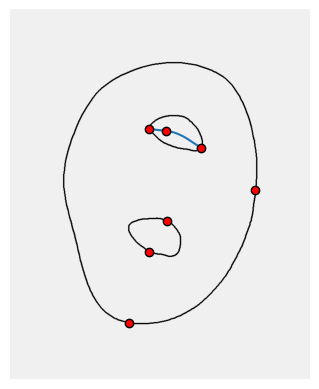

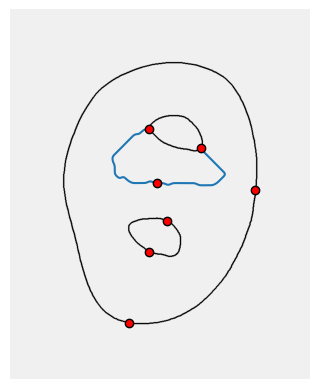

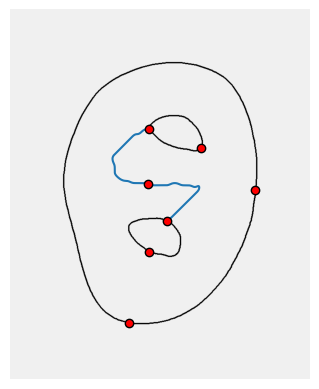

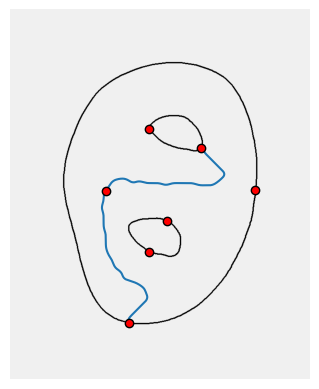

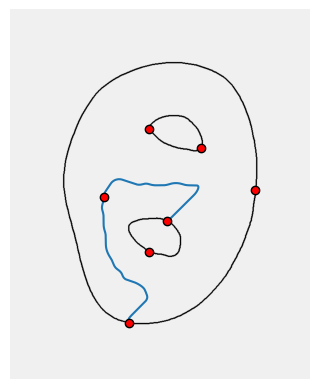

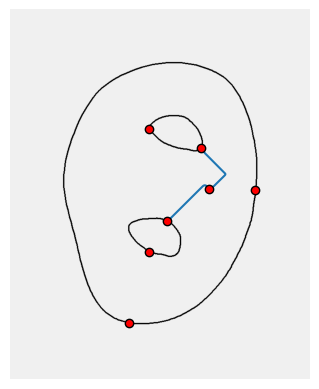

In [32]:
for path in output:
    print (path)
    for data in output[path]:
        print (data,':',output[path][data])
        plt.figure(str(path) + str(data))
        plt.imshow(bimg)
        plt.axis('off')
        x_val = [x[0] for x in output[path][data]['path']]
        y_val = [x[1] for x in output[path][data]['path']]
        plt.plot(x_val,y_val)
        for point in point_stor:
            x, y = point
            plt.scatter(x , y, marker='o', color="red", edgecolors='black', zorder = 2)
        plt.scatter(output[path][data]['midpoint'][0],output[path][data]['midpoint'][1], marker='o', color="red", edgecolors='black', zorder = 2)